# Migration analysis on MENA-FCV countries

* Number of people that left these coutnries, and where did they go
* Number of people that entered these coutnries and where did they come from
* Internally between MENA Origin-Destination visual

In [1]:
import json
from pathlib import Path

import pandas as pd
import plotnine as p9
from IPython.display import Javascript


NOTEBOOK_PATH = Path().cwd().parent
DATA_PATH = NOTEBOOK_PATH / "../data"

In [2]:
country_mapping = {
    "AD": "Andorra",
    "AE": "United Arab Emirates",
    "AF": "Afghanistan",
    "AG": "Antigua and Barbuda",
    "AI": "Anguilla",
    "AL": "Albania",
    "AM": "Armenia",
    "AO": "Angola",
    "AQ": "Antarctica",
    "AR": "Argentina",
    "AS": "American Samoa",
    "AT": "Austria",
    "AU": "Australia",
    "AW": "Aruba",
    "AX": "Åland Islands",
    "AZ": "Azerbaijan",
    "BA": "Bosnia and Herzegovina",
    "BB": "Barbados",
    "BD": "Bangladesh",
    "BE": "Belgium",
    "BF": "Burkina Faso",
    "BG": "Bulgaria",
    "BH": "Bahrain",
    "BI": "Burundi",
    "BJ": "Benin",
    "BL": "Saint Barthélemy",
    "BM": "Bermuda",
    "BN": "Brunei Darussalam",
    "BO": "Bolivia, Plurinational State of",
    "BQ": "Bonaire, Sint Eustatius and Saba",
    "BR": "Brazil",
    "BS": "Bahamas",
    "BT": "Bhutan",
    "BV": "Bouvet Island",
    "BW": "Botswana",
    "BY": "Belarus",
    "BZ": "Belize",
    "CA": "Canada",
    "CC": "Cocos (Keeling) Islands",
    "CD": "Congo, Democratic Republic of the",
    "CF": "Central African Republic",
    "CG": "Congo",
    "CH": "Switzerland",
    "CI": "Côte d'Ivoire",
    "CK": "Cook Islands",
    "CL": "Chile",
    "CM": "Cameroon",
    "CN": "China",
    "CO": "Colombia",
    "CR": "Costa Rica",
    "CU": "Cuba",
    "CV": "Cabo Verde",
    "CW": "Curaçao",
    "CX": "Christmas Island",
    "CY": "Cyprus",
    "CZ": "Czechia",
    "DE": "Germany",
    "DJ": "Djibouti",
    "DK": "Denmark",
    "DM": "Dominica",
    "DO": "Dominican Republic",
    "DZ": "Algeria",
    "EC": "Ecuador",
    "EE": "Estonia",
    "EG": "Egypt",
    "EH": "Western Sahara",
    "ER": "Eritrea",
    "ES": "Spain",
    "ET": "Ethiopia",
    "FI": "Finland",
    "FJ": "Fiji",
    "FK": "Falkland Islands (Malvinas)",
    "FM": "Micronesia, Federated States of",
    "FO": "Faroe Islands",
    "FR": "France",
    "GA": "Gabon",
    "GB": "United Kingdom of Great Britain and Northern Ireland",
    "GD": "Grenada",
    "GE": "Georgia",
    "GF": "French Guiana",
    "GG": "Guernsey",
    "GH": "Ghana",
    "GI": "Gibraltar",
    "GL": "Greenland",
    "GM": "Gambia",
    "GN": "Guinea",
    "GP": "Guadeloupe",
    "GQ": "Equatorial Guinea",
    "GR": "Greece",
    "GS": "South Georgia and the South Sandwich Islands",
    "GT": "Guatemala",
    "GU": "Guam",
    "GW": "Guinea-Bissau",
    "GY": "Guyana",
    "HK": "Hong Kong",
    "HM": "Heard Island and McDonald Islands",
    "HN": "Honduras",
    "HR": "Croatia",
    "HT": "Haiti",
    "HU": "Hungary",
    "ID": "Indonesia",
    "IE": "Ireland",
    "IL": "Israel",
    "IM": "Isle of Man",
    "IN": "India",
    "IO": "British Indian Ocean Territory",
    "IQ": "Iraq",
    "IR": "Iran, Islamic Republic of",
    "IS": "Iceland",
    "IT": "Italy",
    "JE": "Jersey",
    "JM": "Jamaica",
    "JO": "Jordan",
    "JP": "Japan",
    "KE": "Kenya",
    "KG": "Kyrgyzstan",
    "KH": "Cambodia",
    "KI": "Kiribati",
    "KM": "Comoros",
    "KN": "Saint Kitts and Nevis",
    "KP": "Korea, Democratic People's Republic of",
    "KR": "Korea, Republic of",
    "KW": "Kuwait",
    "KY": "Cayman Islands",
    "KZ": "Kazakhstan",
    "LA": "Lao People's Democratic Republic",
    "LB": "Lebanon",
    "LC": "Saint Lucia",
    "LI": "Liechtenstein",
    "LK": "Sri Lanka",
    "LR": "Liberia",
    "LS": "Lesotho",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "LV": "Latvia",
    "LY": "Libya",
    "MA": "Morocco",
    "MC": "Monaco",
    "MD": "Moldova, Republic of",
    "ME": "Montenegro",
    "MF": "Saint Martin (French part)",
    "MG": "Madagascar",
    "MH": "Marshall Islands",
    "MK": "North Macedonia",
    "ML": "Mali",
    "MM": "Myanmar",
    "MN": "Mongolia",
    "MO": "Macao",
    "MP": "Northern Mariana Islands",
    "MQ": "Martinique",
    "MR": "Mauritania",
    "MS": "Montserrat",
    "MT": "Malta",
    "MU": "Mauritius",
    "MV": "Maldives",
    "MW": "Malawi",
    "MX": "Mexico",
    "MY": "Malaysia",
    "MZ": "Mozambique",
    "NA": "Namibia",
    "NC": "New Caledonia",
    "NE": "Niger",
    "NF": "Norfolk Island",
    "NG": "Nigeria",
    "NI": "Nicaragua",
    "NL": "Netherlands, Kingdom of the",
    "NO": "Norway",
    "NP": "Nepal",
    "NR": "Nauru",
    "NU": "Niue",
    "NZ": "New Zealand",
    "OM": "Oman",
    "PA": "Panama",
    "PE": "Peru",
    "PF": "French Polynesia",
    "PG": "Papua New Guinea",
    "PH": "Philippines",
    "PK": "Pakistan",
    "PL": "Poland",
    "PM": "Saint Pierre and Miquelon",
    "PN": "Pitcairn",
    "PR": "Puerto Rico",
    "PS": "Palestine, State of",
    "PT": "Portugal",
    "PW": "Palau",
    "PY": "Paraguay",
    "QA": "Qatar",
    "RE": "Réunion",
    "RO": "Romania",
    "RS": "Serbia",
    "RU": "Russian Federation",
    "RW": "Rwanda",
    "SA": "Saudi Arabia",
    "SB": "Solomon Islands",
    "SC": "Seychelles",
    "SD": "Sudan",
    "SE": "Sweden",
    "SG": "Singapore",
    "SH": "Saint Helena, Ascension and Tristan da Cunha",
    "SI": "Slovenia",
    "SJ": "Svalbard and Jan Mayen",
    "SK": "Slovakia",
    "SL": "Sierra Leone",
    "SM": "San Marino",
    "SN": "Senegal",
    "SO": "Somalia",
    "SR": "Suriname",
    "SS": "South Sudan",
    "ST": "Sao Tome and Principe",
    "SV": "El Salvador",
    "SX": "Sint Maarten (Dutch part)",
    "SY": "Syrian Arab Republic",
    "SZ": "Eswatini",
    "TC": "Turks and Caicos Islands",
    "TD": "Chad",
    "TF": "French Southern Territories",
    "TG": "Togo",
    "TH": "Thailand",
    "TJ": "Tajikistan",
    "TK": "Tokelau",
    "TL": "Timor-Leste",
    "TM": "Turkmenistan",
    "TN": "Tunisia",
    "TO": "Tonga",
    "TR": "Türkiye",
    "TT": "Trinidad and Tobago",
    "TV": "Tuvalu",
    "TW": "Taiwan, Province of China",
    "TZ": "Tanzania, United Republic of",
    "UA": "Ukraine",
    "UG": "Uganda",
    "UM": "United States Minor Outlying Islands",
    "US": "United States of America",
    "UY": "Uruguay",
    "UZ": "Uzbekistan",
    "VA": "Holy See",
    "VC": "Saint Vincent and the Grenadines",
    "VE": "Venezuela, Bolivarian Republic of",
    "VG": "Virgin Islands (British)",
    "VI": "Virgin Islands (U.S.)",
    "VN": "Viet Nam",
    "VU": "Vanuatu",
    "WF": "Wallis and Futuna",
    "WS": "Samoa",
    "YE": "Yemen",
    "YT": "Mayotte",
    "ZA": "South Africa",
    "ZM": "Zambia",
    "ZW": "Zimbabwe",
}

COUNTRY_CODES = [
    "SY",
    "EG",
    "LB",
    "IQ",
    "PS",
    "PS",
    "MA",
    "PK",
    "AF",
    "DZ",
]

In [3]:
df = pd.read_csv(DATA_PATH / "international_migration_flow.csv").assign(
    country_from_iso2=lambda x: x["country_from"],
    country_to_iso2=lambda x: x["country_to"],
    country_from=lambda x: x["country_from"].map(country_mapping),
    country_to=lambda x: x["country_to"].map(country_mapping),
)
df.sample(n=5)

,country_from,country_to,migration_month,num_migrants,country_from_iso2,country_to_iso2
1284410,Suriname,Peru,2021-04,5,SR,PE
905121,North Macedonia,Sweden,2022-02,41,MK,SE
1320198,Syrian Arab Republic,Togo,2019-08,0,SY,TG
777372,Kazakhstan,Zimbabwe,2020-05,0,KZ,ZW
738801,Kiribati,Lithuania,2022-02,0,KI,LT


The table below shows the annual migration flow from MENA-FCV countries to other countries

In [4]:
(
    df.query("country_from_iso2 in @COUNTRY_CODES")
    .assign(
        migration_month=lambda x: pd.to_datetime(x["migration_month"], format="%Y-%m"),
        migration_year=lambda x: x["migration_month"].dt.year,
    )
    .groupby(["country_from", "migration_year"])
    .agg(
        {
            "num_migrants": "sum",
        }
    )
    .reset_index()
    .sort_values(["country_from", "migration_year"])
    .pivot(index="country_from", columns="migration_year", values="num_migrants")
)

migration_year,2019,2020,2021,2022
country_from,,,,
Afghanistan,103530,91669,189945,166065
Algeria,140366,124884,121219,170152
Egypt,604339,343670,481975,914587
Iraq,112660,121287,107685,111173
Lebanon,204157,234975,221039,187912
Morocco,239073,185550,207872,278507
Pakistan,704808,414645,392041,1413852
Syrian Arab Republic,140730,166373,235297,355909


In [5]:
(
    df.query("country_from_iso2 in @COUNTRY_CODES")
    .assign(
        migration_month=lambda x: pd.to_datetime(x["migration_month"], format="%Y-%m"),
        migration_year=lambda x: x["migration_month"].dt.year,
    )
    .groupby(["country_from", "country_to"])
    .agg(
        {
            "num_migrants": "sum",
        }
    )
    .reset_index()
    .sort_values(["country_from", "num_migrants"], ascending=[True, False])
    # get top 5 destination countries for each origin country
    .groupby("country_from")
    .head(5)
    .reset_index(drop=True)
)

,country_from,country_to,num_migrants
0,Afghanistan,Pakistan,151558
1,Afghanistan,Türkiye,83009
2,Afghanistan,United States of America,66004
3,Afghanistan,United Arab Emirates,33344
4,Afghanistan,Saudi Arabia,31936
5,Algeria,France,225916
6,Algeria,Canada,36543
7,Algeria,Morocco,35690
8,Algeria,Spain,24437
9,Algeria,Türkiye,21996


The table below shows the annual migration flow from other countries to MENA-FCV countries

In [6]:
(
    df.query("country_to_iso2 in @COUNTRY_CODES")
    .assign(
        migration_month=lambda x: pd.to_datetime(x["migration_month"], format="%Y-%m"),
        migration_year=lambda x: x["migration_month"].dt.year,
    )
    .groupby(["country_to", "migration_year"])
    .agg(
        {
            "num_migrants": "sum",
        }
    )
    .reset_index()
    .sort_values(["country_to", "migration_year"])
    .pivot(index="country_to", columns="migration_year", values="num_migrants")
)

migration_year,2019,2020,2021,2022
country_to,,,,
Afghanistan,89590,66438,60701,81698
Algeria,85849,78264,60543,67476
Egypt,505476,586969,538491,466232
Iraq,165750,123981,135884,167685
Lebanon,84951,52910,67597,97156
Morocco,135912,130713,121452,121802
Pakistan,667201,616570,623130,485986
Syrian Arab Republic,311007,175655,149338,139160


In [7]:
(
    df.query("country_to_iso2 in @COUNTRY_CODES")
    .assign(
        migration_month=lambda x: pd.to_datetime(x["migration_month"], format="%Y-%m"),
        migration_year=lambda x: x["migration_month"].dt.year,
    )
    .groupby(["country_to", "country_from"])
    .agg(
        {
            "num_migrants": "sum",
        }
    )
    .reset_index()
    .sort_values(["country_to", "num_migrants"], ascending=[True, False])
    # get top 5 origin countries for each destination country
    .groupby("country_to")
    .head(5)
    .reset_index(drop=True)
)

,country_to,country_from,num_migrants
0,Afghanistan,Türkiye,87965
1,Afghanistan,Pakistan,69829
2,Afghanistan,Saudi Arabia,38407
3,Afghanistan,India,22558
4,Afghanistan,United Arab Emirates,15481
5,Algeria,France,58446
6,Algeria,Morocco,22444
7,Algeria,Tunisia,13430
8,Algeria,Egypt,11705
9,Algeria,Türkiye,10589


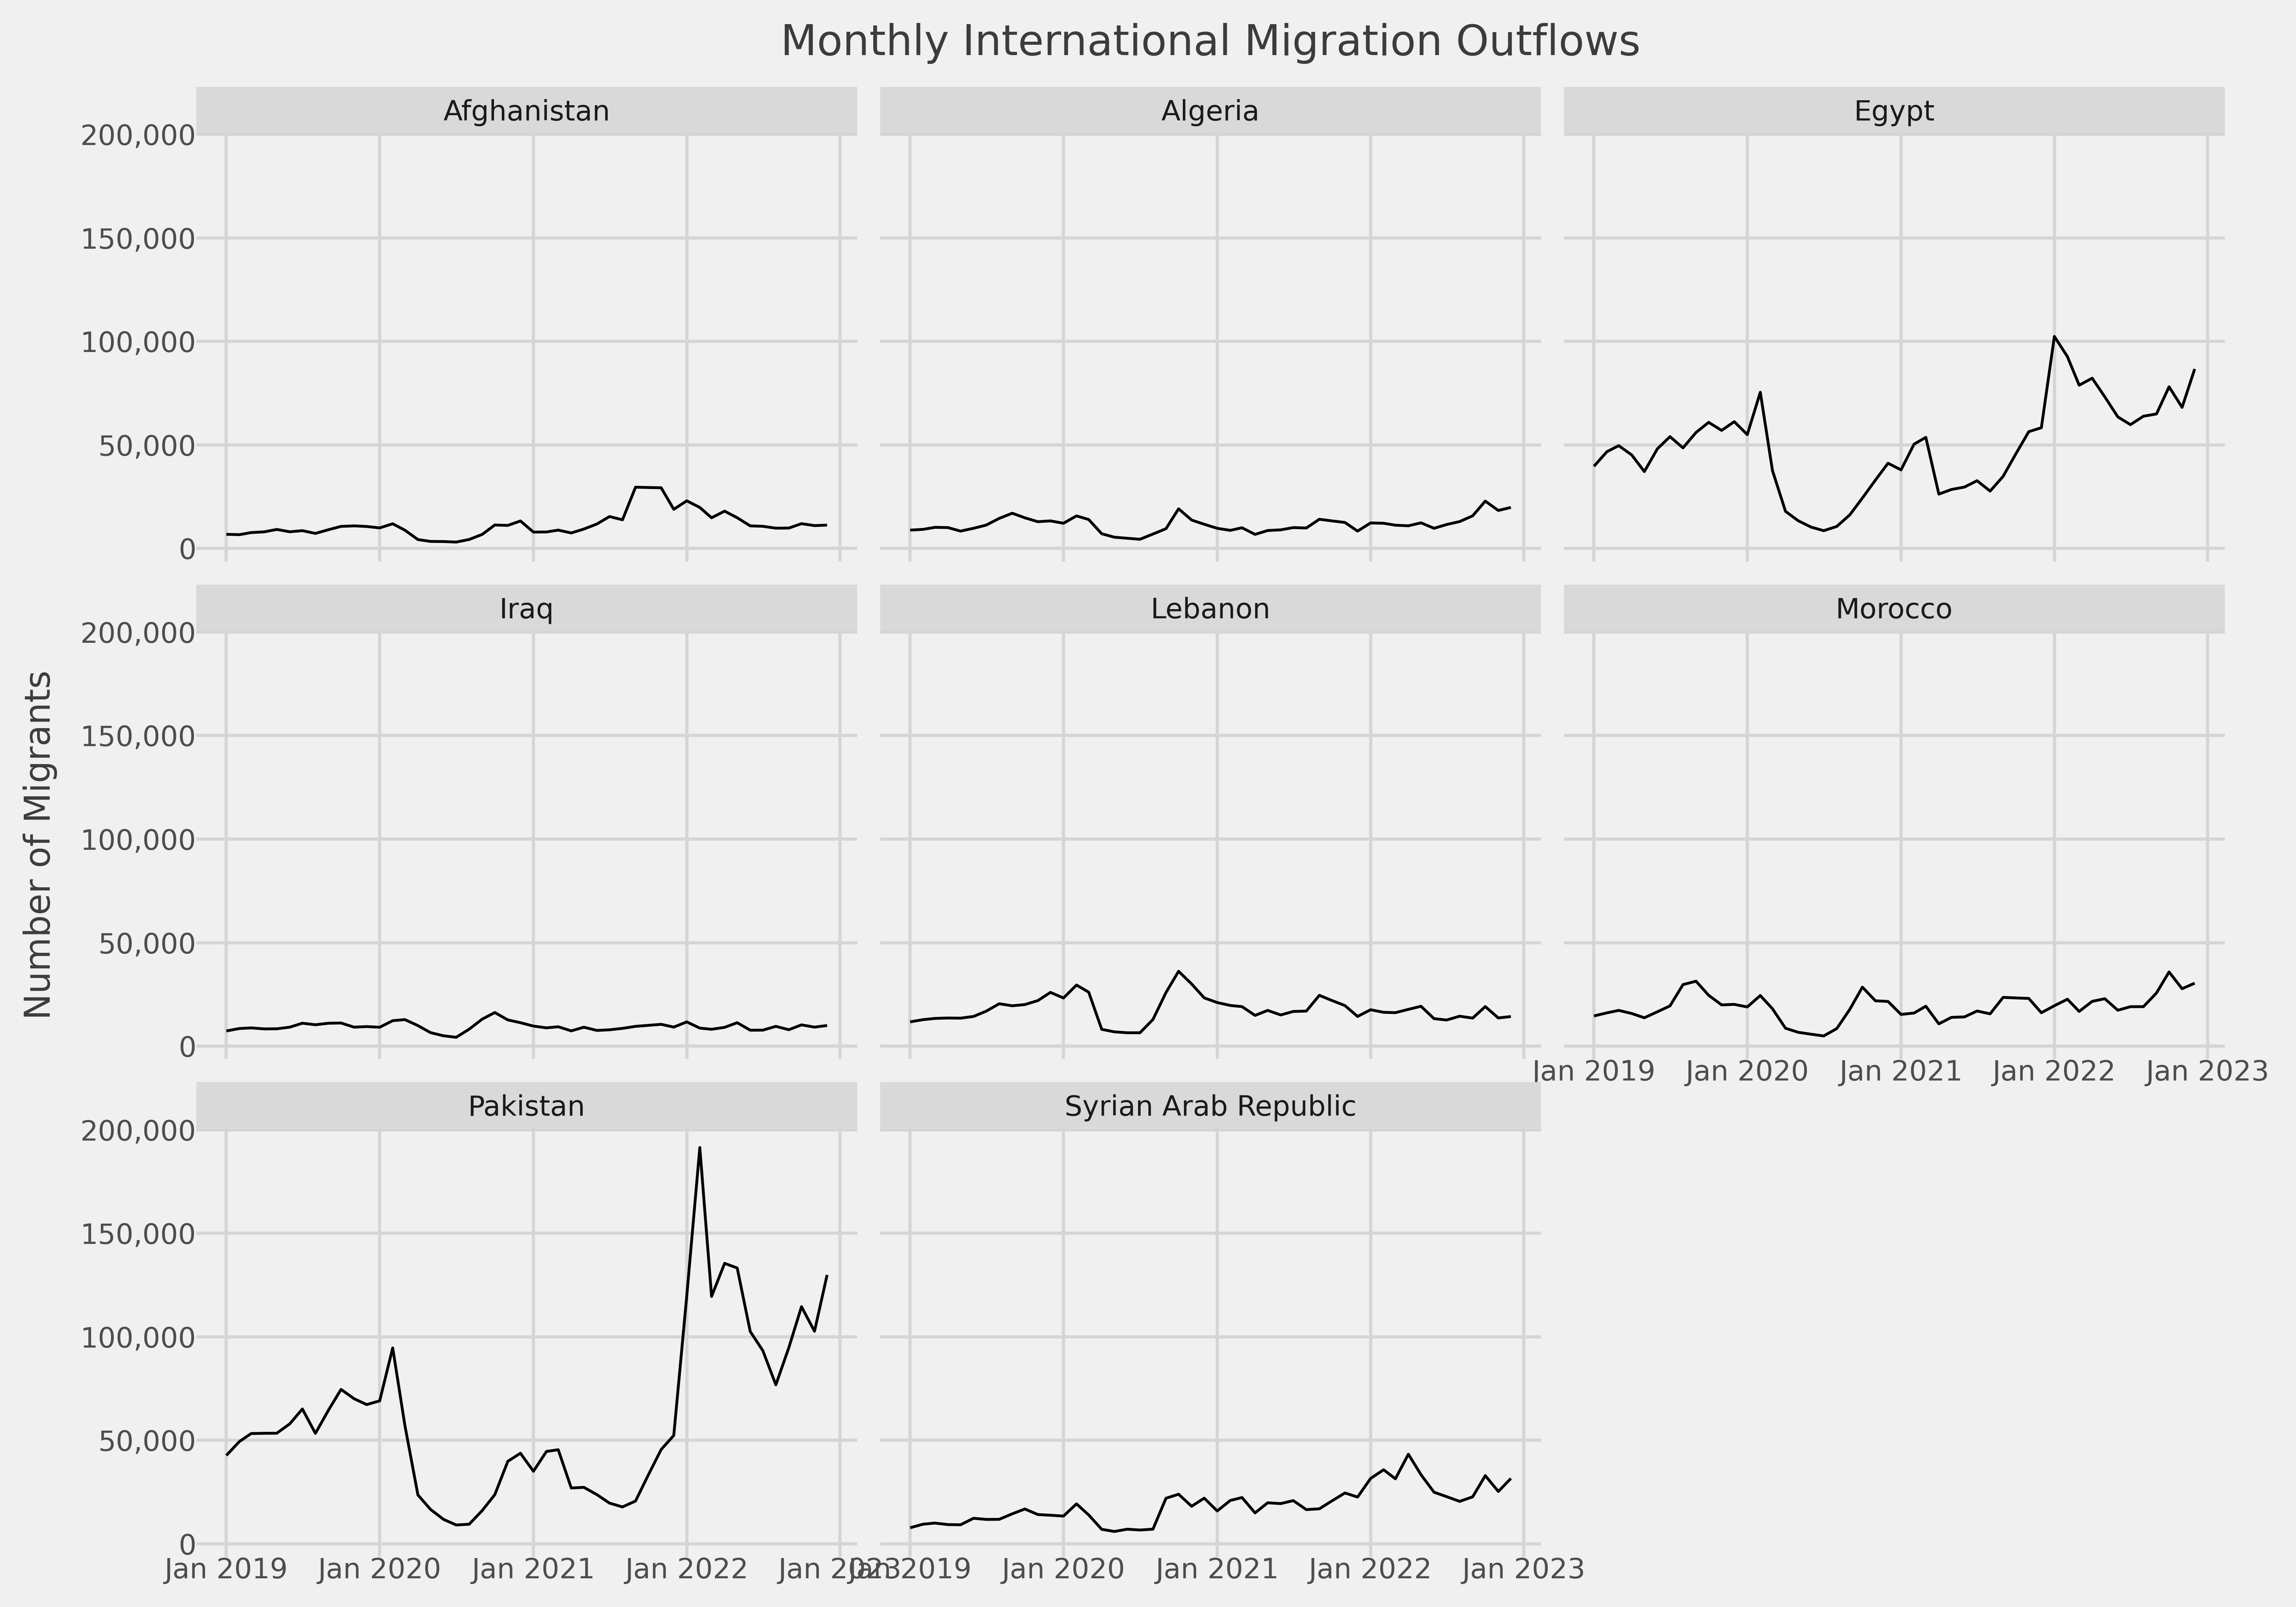

In [8]:
(
    df.query("country_from_iso2 in @COUNTRY_CODES")
    .assign(
        migration_month=lambda x: pd.to_datetime(x["migration_month"], format="%Y-%m"),
        migration_year=lambda x: x["migration_month"].dt.year,
    )
    .groupby(["country_from", "migration_month"])
    .agg({"num_migrants": "sum"})
    .reset_index()
    .sort_values(["country_from", "migration_month"])
    .pipe((p9.ggplot, "data"))
    + p9.aes(x="migration_month", y="num_migrants", group="country_from")
    + p9.geom_line()
    + p9.facet_wrap("country_from", ncol=3)
    + p9.scale_y_continuous(labels=lambda labels: [f"{int(x):,}" for x in labels])
    + p9.scale_x_date(date_labels="%b %Y", breaks="1 year")
    + p9.labs(
        title="Monthly International Migration Outflows",
        x="",
        y="Number of Migrants",
    )
    + p9.theme_538()
    + p9.theme(figure_size=(10, 7), dpi=300)
)

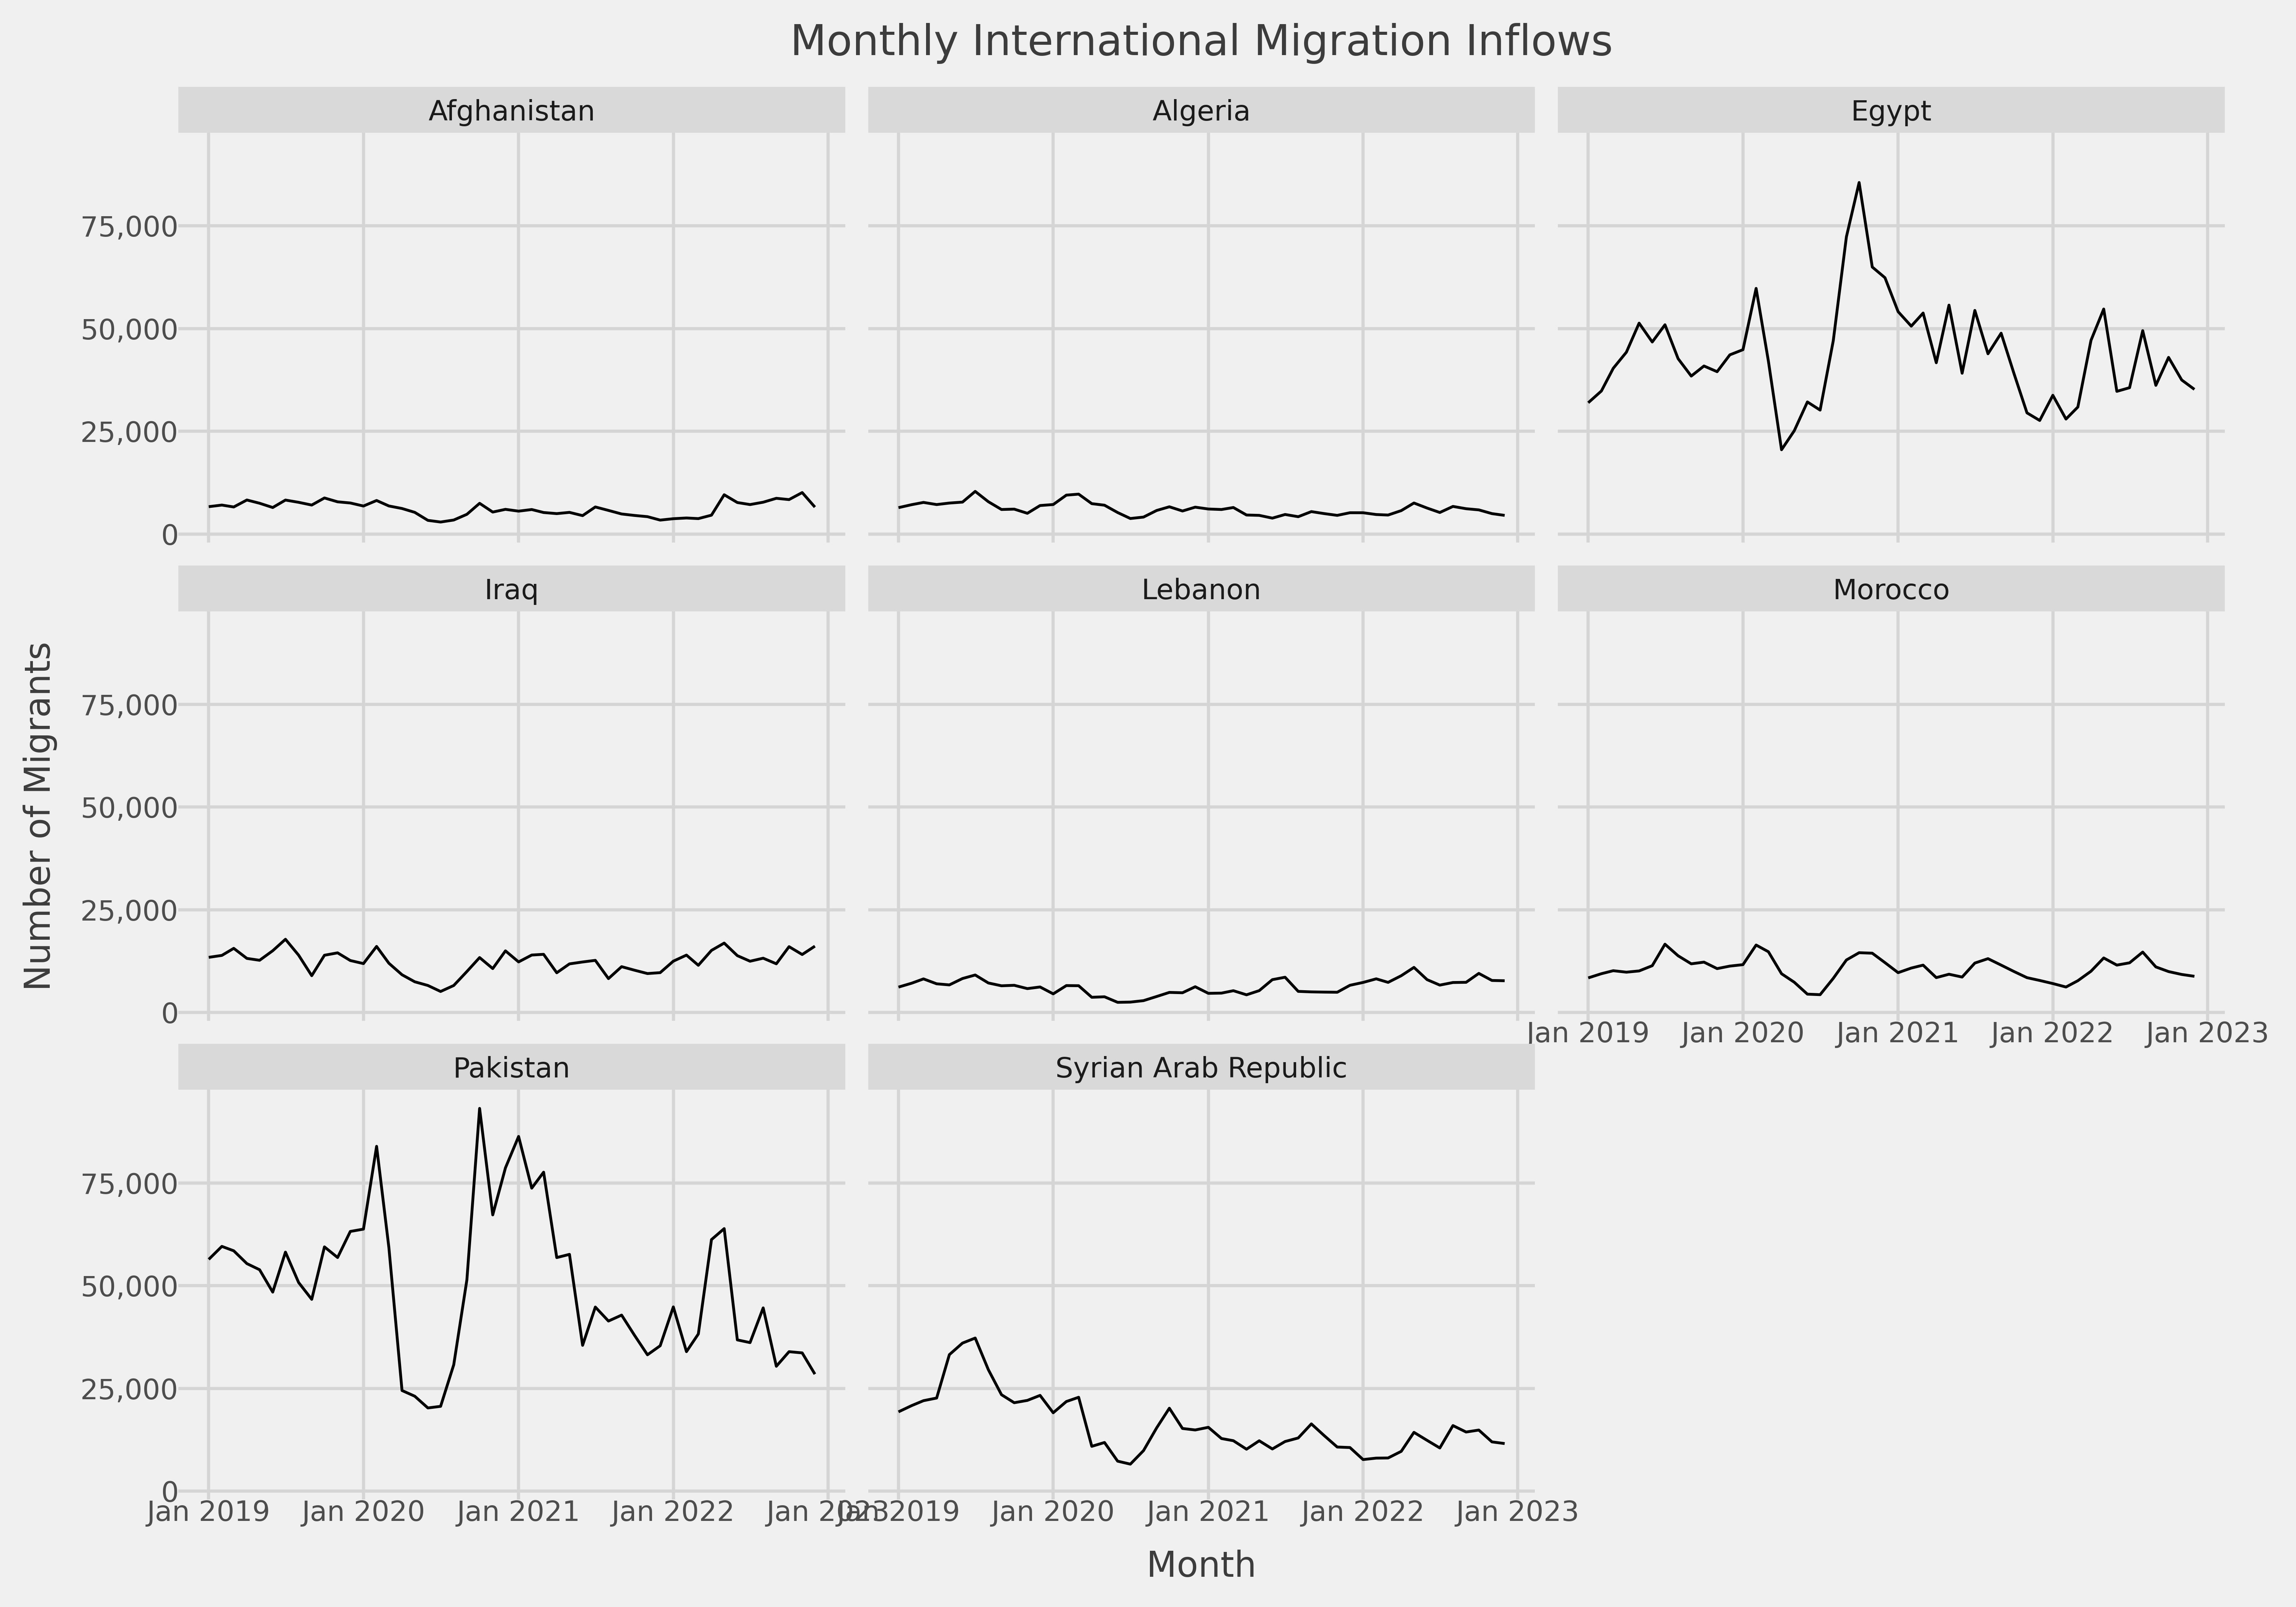

In [9]:
(
    df.query("country_to_iso2 in @COUNTRY_CODES")
    .assign(
        migration_month=lambda x: pd.to_datetime(x["migration_month"], format="%Y-%m"),
        migration_year=lambda x: x["migration_month"].dt.year,
    )
    .groupby(["country_to", "migration_month"])
    .agg({"num_migrants": "sum"})
    .reset_index()
    .sort_values(["country_to", "migration_month"])
    .pipe((p9.ggplot, "data"))
    + p9.aes(x="migration_month", y="num_migrants", group="country_to")
    + p9.geom_line()
    + p9.facet_wrap("country_to", ncol=3)
    + p9.scale_y_continuous(labels=lambda labels: [f"{int(x):,}" for x in labels])
    + p9.scale_x_date(date_labels="%b %Y", breaks="1 year")
    + p9.labs(
        title="Monthly International Migration Inflows",
        x="Month",
        y="Number of Migrants",
    )
    + p9.theme_538()
    + p9.theme(figure_size=(10, 7), dpi=300)
)

In [14]:
mena_df = (
    df.query("country_to_iso2 in @COUNTRY_CODES & country_from_iso2 in @COUNTRY_CODES")
    .assign(
        migration_month=lambda x: pd.to_datetime(x["migration_month"], format="%Y-%m"),
        migration_year=lambda x: x["migration_month"].dt.year,
    )
    .groupby(["country_to", "country_from"])
    .agg({"num_migrants": "sum"})
    .reset_index()
    .sort_values(["country_to", "country_from", "num_migrants"], ascending=True)
    .pivot(index="country_to", columns="country_from", values="num_migrants")
    .fillna(0)
)

In [15]:
# Display the migration matrix
print("Migration Matrix Structure:")
print("Rows (country_to): Countries receiving migrants")
print("Columns (country_from): Countries sending migrants")
print("\nMatrix shape:", mena_df.shape)
print("\nCountries included:", list(mena_df.index))
print("\nSample of the matrix:")
mena_df.head()

Migration Matrix Structure:
Rows (country_to): Countries receiving migrants
Columns (country_from): Countries sending migrants

Matrix shape: (8, 8)

Countries included: ['Afghanistan', 'Algeria', 'Egypt', 'Iraq', 'Lebanon', 'Morocco', 'Pakistan', 'Syrian Arab Republic']

Sample of the matrix:


country_from,Afghanistan,Algeria,Egypt,Iraq,Lebanon,Morocco,Pakistan,Syrian Arab Republic
country_to,,,,,,,,
Afghanistan,0.0,228.0,543.0,632.0,186.0,158.0,69829.0,586.0
Algeria,152.0,0.0,11705.0,4006.0,1638.0,22444.0,1634.0,3452.0
Egypt,889.0,8821.0,0.0,20667.0,33077.0,7646.0,2821.0,56637.0
Iraq,882.0,1838.0,37282.0,0.0,20655.0,1568.0,30700.0,108385.0
Lebanon,229.0,1437.0,9672.0,8446.0,0.0,767.0,509.0,96435.0


In [16]:
Javascript(filename="circles.js")

<IPython.core.display.Javascript object>

In [17]:
matrix_data = mena_df.values.tolist()
country_labels = mena_df.index.tolist()

print(f"Creating chord diagram with {len(country_labels)} countries")
print(f"Matrix dimensions: {len(matrix_data)} x {len(matrix_data[0])}")
print("Countries:", ", ".join(country_labels))

# Check if we're in a Jupyter Book build environment
try:
    # This will work in regular Jupyter notebooks
    get_ipython()
    in_notebook = True
except NameError:
    in_notebook = False

# Try to display the interactive D3 visualization
if in_notebook:
    try:
        display(
            Javascript(
                """
        (function(element){
            require.config({
                paths: {
                    d3: 'https://d3js.org/d3.v7.min'
                }
            });
            
            require(['d3'], function(d3) {
                // Check if chordDiagram is available, if not, load it
                if (typeof chordDiagram === 'undefined') {
                    // Fallback: display a message
                    element.append('<div style="padding: 20px; border: 2px dashed #ccc; text-align: center;">' +
                                 '<h4>Interactive D3.js Chord Diagram</h4>' +
                                 '<p>This interactive visualization is available in the Jupyter notebook.</p>' +
                                 '<p>Please refer to the static visualizations below for the built book version.</p>' +
                                 '</div>');
                } else {
                    // Clear any existing content
                    element.empty();
                    
                    // Add a title
                    element.append('<h3 style="text-align: center; margin-bottom: 20px;">MENA-FCV Countries Migration Flow (Interactive)</h3>');
                    
                    // Create the visualization with labels
                    chordDiagram(element.get(0), %s, 900, 900, %s);
                    
                    // Add instructions
                    element.append('<p style="text-align: center; margin-top: 10px; font-size: 12px; color: #666;">Hover over arcs and ribbons to explore migration flows</p>');
                }
            });
        })(element);
        """
                % (json.dumps(matrix_data), json.dumps(country_labels))
            )
        )
    except Exception as e:
        print(f"Interactive visualization not available: {e}")
        print("Please check the static visualizations below.")
else:
    print("Static visualizations will be shown in the built book.")

Creating chord diagram with 8 countries
Matrix dimensions: 8 x 8
Countries: Afghanistan, Algeria, Egypt, Iraq, Lebanon, Morocco, Pakistan, Syrian Arab Republic


<IPython.core.display.Javascript object>